In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy
import matplotlib.gridspec as gridspec

import glob
import time
from tqdm import tqdm
import re
from io import open

from datetime import datetime, time
from dateutil.relativedelta import relativedelta

In [ ]:
diag=pd.read_table('/content/drive/MyDrive/5_mimic_iv/diagnoses_icd.csv', sep=',')
pat=pd.read_table('/content/drive/MyDrive/5_mimic_iv/patients.csv', sep=',')
admi=pd.read_table('/content/drive/MyDrive/5_mimic_iv/admissions.csv', sep=',')
icd9_10=pd.read_table('/content/drive/MyDrive/5_mimic_iv/icd_info/ICD9_to_icd10.csv', sep=',')

In [ ]:
data = pd.merge(pat, pd.merge(diag, admi.drop(["subject_id"], axis=1)))
data['icd_code'] = [val.strip() for val in data['icd_code']]
data['admit_year'] = data['admittime'].map(lambda x: int(x.split('-')[0]))
data['admit_age'] = data['anchor_age'] + data['admit_year'] - data['anchor_year']

# TXT 파일확인

In [ ]:
%cd /content/drive/MyDrive/5_mimic_iv/icd_info

txt_file_name = ['ICD9.txt','ICD10_level0.txt','ICD10_level1.txt','ICD10_level23.txt']
cnt = 0

for i in txt_file_name:
  cnt+1
  if(i != 'ICD9.txt'):
    continue
  with open(f"{i}", "r", encoding='ISO-8859-1') as file:
    for line in file:
      pass

/content/drive/MyDrive/5_mimic_iv/icd_info


# TXT TO CSV

In [ ]:
txt_file_name = ['ICD9.txt','ICD10_level0.txt','ICD10_level1.txt','ICD10_level23.txt']

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv/txt파일
ICD10_level0_txt = pd.read_csv('ICD10_level0.txt', delimiter = '  ', encoding = 'ISO-8859-1',header=None)
ICD10_level0_txt = ICD10_level0_txt.rename(columns={ICD10_level0_txt.columns[0]: "disease"})
ICD10_level0_txt = ICD10_level0_txt.rename(columns={ICD10_level0_txt.columns[1]: "describe"})
ICD10_level0_txt
ICD10_level0_txt.to_csv("ICD10_level0.csv", index = False)

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/학부연구생/5_mimic_iv/txt파일'
/content/drive/MyDrive/5_mimic_iv/icd_info


<ipython-input-7-6fe336627156>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ICD10_level0_txt = pd.read_csv('ICD10_level0.txt', delimiter = '  ', encoding = 'ISO-8859-1',header=None)


In [ ]:
ICD10_level1_txt = pd.read_csv('ICD10_level1.txt', delimiter = '  ', encoding = 'ISO-8859-1',header=None)
ICD10_level1_txt = ICD10_level1_txt.rename(columns={ICD10_level1_txt.columns[0]: "disease"})
ICD10_level1_txt = ICD10_level1_txt.rename(columns={ICD10_level1_txt.columns[1]: "describe"})
ICD10_level1_txt.to_csv("ICD10_level1.csv", index = False)

<ipython-input-8-374d371c343e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ICD10_level1_txt = pd.read_csv('ICD10_level1.txt', delimiter = '  ', encoding = 'ISO-8859-1',header=None)


In [ ]:
ICD10_level23_txt = pd.read_csv('ICD10_level23.txt', delimiter = '\t', encoding = 'ISO-8859-1',header=None)
ICD10_level23_txt = ICD10_level23_txt.rename(columns={ICD10_level23_txt.columns[0]: "disease"})
ICD10_level23_txt

,disease
0,00001 A00 0 Cholera ...
1,00002 A000 1 Cholera due to Vibrio cholerae...
2,00003 A001 1 Cholera due to Vibrio cholerae...
3,"00004 A009 1 Cholera, unspecified ..."
4,00005 A01 0 Typhoid and paratyphoid fevers...
...,...
95523,95524 U07 0 Emergency use of U07 ...
95524,95525 U070 1 Vaping-related disorder ...
95525,95526 U071 1 COVID-19 ...
95526,95527 U09 0 Post COVID-19 condition ...


In [ ]:
def cut_str(x):
  x_split = x.split(' ')
  x_split = list(filter(lambda x: x != '', x_split))
  return x_split[1]

In [ ]:
def change_text(x):
  x_split = x.split(' ')
  x_split = list(filter(lambda x: x != '', x_split)) #
  x_split.remove(x_split[0])
  x_split.remove(x_split[0])
  x_split.remove(x_split[0])
  x_split = set(x_split)
  x_split = " ".join(x_split)
  return x_split

In [ ]:
ICD10_level23_txt['describe'] = ICD10_level23_txt['disease'].apply(change_text)

In [ ]:
ICD10_level23_txt['disease'] = ICD10_level23_txt['disease'].apply(cut_str)

In [ ]:
ICD10_level23_txt
ICD10_level23_txt.to_csv("ICD10_level23.csv", index = False)

In [ ]:
icd10_level_0 = pd.read_csv('ICD10_level0.csv')
icd10_level_0['cnt'] = 0

In [ ]:
icd10_level_1 = pd.read_csv('ICD10_level1.csv')
icd10_level_1['cnt'] = 0
icd10_level_1

,disease,describe,cnt
0,A00-A09,Intestinal infectious diseases,0
1,A15-A19,Tuberculosis,0
2,A20-A28,Certain zoonotic bacterial diseases,0
3,A30-A49,Other bacterial diseases,0
4,A50-A64,Infections with a predominantly sexual mode of...,0
...,...,...,...
280,Z66-Z66,Do not resuscitate status,0
281,Z67-Z67,Blood type,0
282,Z68-Z68,Body mass index (BMI),0
283,Z69-Z76,Persons encountering health services in other ...,0


In [ ]:
icd10_level_23 = pd.read_csv('ICD10_level23.csv')
icd10_level_23['cnt'] = 0
icd10_level_23

,disease,describe,cnt
0,A00,Cholera,0
1,A000,"biovar cholerae Cholera to 01, Vibrio due",0
2,A001,"biovar eltor cholerae Cholera to 01, Vibrio due",0
3,A009,"unspecified Cholera,",0
4,A01,paratyphoid Typhoid fevers and,0
...,...,...,...
95523,U07,of U07 use Emergency,0
95524,U070,Vaping-related disorder,0
95525,U071,COVID-19,0
95526,U09,COVID-19 condition Post,0


In [ ]:
def check_string_contains_pattern(text, pattern):

    regex = re.compile(pattern)

    match = regex.search(text)

    return bool(match)

In [ ]:
def to_dataframe_level(res, level):

  level_copy = level.copy()

  for i in range(len(level_copy)):
    for j in range(len(res)):
      a = level_copy['disease'].iloc[i]
      b = res['icd_code'].iloc[j]
      b = b[:3]
      if(check_string_contains_pattern(a, b) == True):
        level_copy['cnt'].iloc[i] += res['count'].iloc[j]

  return pd.DataFrame(level_copy)

In [ ]:
def to_dataframe_level_23(res, level):

  level_copy = level.copy()

  for i in tqdm(range(len(level_copy))):
    startwith_res = res[res['icd_code'].str.startswith(level_copy['disease'].iloc[i])]

    level_copy['cnt'].iloc[i] = startwith_res['count'].sum()

  return pd.DataFrame(level_copy)

# 시각화 함수

In [ ]:
def level_coverter(level, res1_s, res2_s, T_num):
  if level == 0:
    previous_disease_level = to_dataframe_level(res1_s,icd10_level_0)
    after_disease_level = to_dataframe_level(res2_s,icd10_level_0)
  if level == 1:
    previous_disease_level = to_dataframe_level(res1_s, icd10_level_1)
    after_disease_level = to_dataframe_level(res2_s, icd10_level_1)
  if level == 2:
    previous_disease_level = to_dataframe_level_23(res1_s, icd10_level_23)
    after_disease_level = to_dataframe_level_23(res2_s, icd10_level_23)
  previous_disease_level.rename(columns={'cnt':'backward'}, inplace=True)
  after_disease_level.rename(columns={'cnt':'forward'}, inplace=True)

  res3 = previous_disease_level.merge(after_disease_level, on=['disease','describe'])
  res3 = res3.set_index('disease')
  res3["total"] = res3["backward"] + res3["forward"]
  # res3 = res3.sort_values(by='total', ascending=False).iloc[0:T_num].iloc[::-1]
  res3['after_minus_previous'] = (res3['forward'] - res3['backward']).abs()
  res3 = res3.sort_values('after_minus_previous', ascending=False).iloc[0:T_num].iloc[::-1]
  res3['backward'] = res3['backward']*(-1)
  return res3

In [ ]:
def plotfunction(x,  prev_icd):
  fig=plt.figure(figsize=(15,15), dpi=100)
  plt.title("previous icd code: {}".format(prev_icd))
  (x['forward']/x['total'].sum()* 100).plot.barh()
  (x['backward']/x['total'].sum()* 100).plot.barh(color='orange')
  for i, (forward, backward) in enumerate(zip(x['forward'], x['backward'])):

    if (forward / x['total'].sum()) * 100 < 2:
      plt.text((forward / x['total'].sum()) * 100 + 1 , i, f'{forward:.0f}', ha='left', va='center')
    else:
      plt.text((forward / x['total'].sum()) * 100 - 1, i, f'{forward:.0f}', ha='left', va='center')
    if (backward / x['total'].sum()) * 100 > -2:
      plt.text((backward / x['total'].sum()) * 100 - 1, i, f'{-backward:.0f}', ha='right', va='center')
    else:
      plt.text((backward / x['total'].sum()) * 100 + 1, i, f'{-backward:.0f}', ha='right', va='center')
  plt.xlabel('Percentage (%)')
  plt.show()

# MAIN

In [ ]:
def disease_count_plot(data=data, age=None, gen=None, mrg=None, eth=None, prev_icd=None, forward_years=103, backward_years=103, level_number=None):
    T_num = 20
    plot_data = data.copy()

    if age != None:
        if type(age) == int :
            if age >= 90:
                raise Exception("Enter a number between 0 and 89.")
            else:
                plot_data = plot_data[plot_data["admit_age"] == age]
        elif len(age) == 2:
            if age[1] >= 90:
                raise Exception("Enter a number between 0 and 89.")
            else:
                plot_data = plot_data[(plot_data["admit_age"] >= age[0]) & (plot_data["admit_age"] <= age[1])]
        else: raise Exception("age can only receive two argument.")

    if gen != None:
        gen=gen.upper()
        if gen in ["M", "MAN", "MALE"]:
            plot_data = plot_data[plot_data["gender"] == 'M']
        elif gen in ["W", "WOMAN", "F", "FEMALE"]:
            plot_data = plot_data[plot_data["gender"] == 'F']
        else:
            raise Exception("Enter one of these M, F")

    if mrg != None:
        mrg=mrg.upper()
        if mrg == 'NAN':
            plot_data = plot_data[plot_data["marital_status"].isna()]
        elif mrg in ['SINGLE', 'MARRIED', 'WIDOWED', 'DIVORCED']:
            plot_data = plot_data[plot_data["marital_status"] == mrg]
        else:
            raise Exception("Enter one of these NAN, SINGLE, MARRIED, WIDOWED, DIVORCED")

    if eth != None:
        eth=eth.upper()
        if eth in ['WHITE', 'HISPANIC/LATINO', 'BLACK/AFRICAN AMERICAN', 'AMERICAN INDIAN/ALASKA NATIVE', 'ASIAN', 'OTHER', 'UNKNOWN', 'UNABLE TO OBTAIN']:
            plot_data = plot_data[plot_data["ethnicity"] == eth]
        else:
            raise Exception("Enter one of these WHITE, HISPANIC/LATINO, BLACK/AFRICAN AMERICAN, AMERICAN INDIAN/ALASKA NATIVE, ASIAN, OTHER, UNKNOWN, UNABLE TO OBTAIN")


    if prev_icd != None:
        icd_data = plot_data[plot_data["icd_code"] == prev_icd]
        if icd_data.empty: raise Exception("Please check your icd_code")
        max_time = datetime.strptime(max(plot_data["admittime"]), '%Y-%m-%d %H:%M:%S')
        time_df = icd_data.groupby('subject_id')['admittime'].apply(lambda x: datetime.strptime(min(x), '%Y-%m-%d %H:%M:%S')).to_frame()
        time_df['backwardtime'] = time_df['admittime'].apply(lambda x: x + relativedelta(years=-backward_years))
        time_df['forwardtime'] = time_df['admittime'].apply(lambda x: (x + relativedelta(years=forward_years))
                                                             if x < (max_time + relativedelta(years=-forward_years))
                                                             else max_time)
        time_df.rename(columns = {'admittime':'admittime_t'},inplace=True)

        plot_data = plot_data[plot_data['subject_id'].isin(time_df.index)]
        plot_data = pd.merge(plot_data, time_df[['forwardtime','admittime_t', 'backwardtime']], on='subject_id', how='inner')

    plot_data = plot_data.copy().drop_duplicates(['subject_id', 'icd_code'])

    if prev_icd != None:
        if(level_number == None):
          res1 = plot_data[(plot_data['admittime'] <= plot_data['forwardtime']) & (plot_data['admittime'] > plot_data['admittime_t'])]
          res1_s = res1["icd_code"].value_counts().iloc[::-1]
          res2 = plot_data[(plot_data['admittime'] >= plot_data['backwardtime']) & (plot_data['admittime'] < plot_data['admittime_t'])]
          res2_s = res2["icd_code"].value_counts().iloc[::-1]

          res3 = pd.concat([res2_s,res1_s], axis=1)

          res3.columns=['backward', 'forward']
          res3 = res3.fillna(0)
          res3['after_minus_previous'] = (res3['forward'] - res3['backward']).abs()
          res3 = res3.sort_values('after_minus_previous', ascending=False).iloc[0:T_num].iloc[::-1]
          res3['total'] = res3['forward'] + res3['backward']
          # res3 = res3.sort_values(by='total', ascending=False).iloc[0:T_num].iloc[::-1]
          res3['backward'] = res3['backward']*(-1)

          plotfunction(res3,  prev_icd)

        if level_number != None:

          res1 = plot_data[(plot_data['admittime'] <= plot_data['forwardtime']) & (plot_data['admittime'] > plot_data['admittime_t'])]
          res2 = plot_data[(plot_data['admittime'] >= plot_data['backwardtime']) & (plot_data['admittime'] < plot_data['admittime_t'])]

          res1_s = res1["icd_code"].value_counts()
          res2_s = res2["icd_code"].value_counts()


          res1_s = res1_s.reset_index()
          res1_s.rename(columns={'icd_code' : 'count'}, inplace=True)
          res1_s.rename(columns={'index' : 'icd_code'}, inplace=True)

          res2_s = res2_s.reset_index()
          res2_s.rename(columns={'icd_code' : 'count'}, inplace=True)
          res2_s.rename(columns={'index' : 'icd_code'}, inplace=True)


        if level_number == 0:
          res3 = level_coverter(0, res1_s, res2_s, T_num)
          plotfunction(res3, prev_icd)

        if level_number == 1:
          res3 = level_coverter(1, res1_s, res2_s, T_num)
          plotfunction(res3, prev_icd)


        if level_number == 2:
          res3 = level_coverter(2, res1_s, res2_s, T_num)
          plotfunction(res3, prev_icd)


    elif prev_icd == None:
      plot_data.groupby('icd_code')['subject_id'].apply(lambda x: len(list(x))).sort_values(ascending=False)[0:T_num].plot.barh()

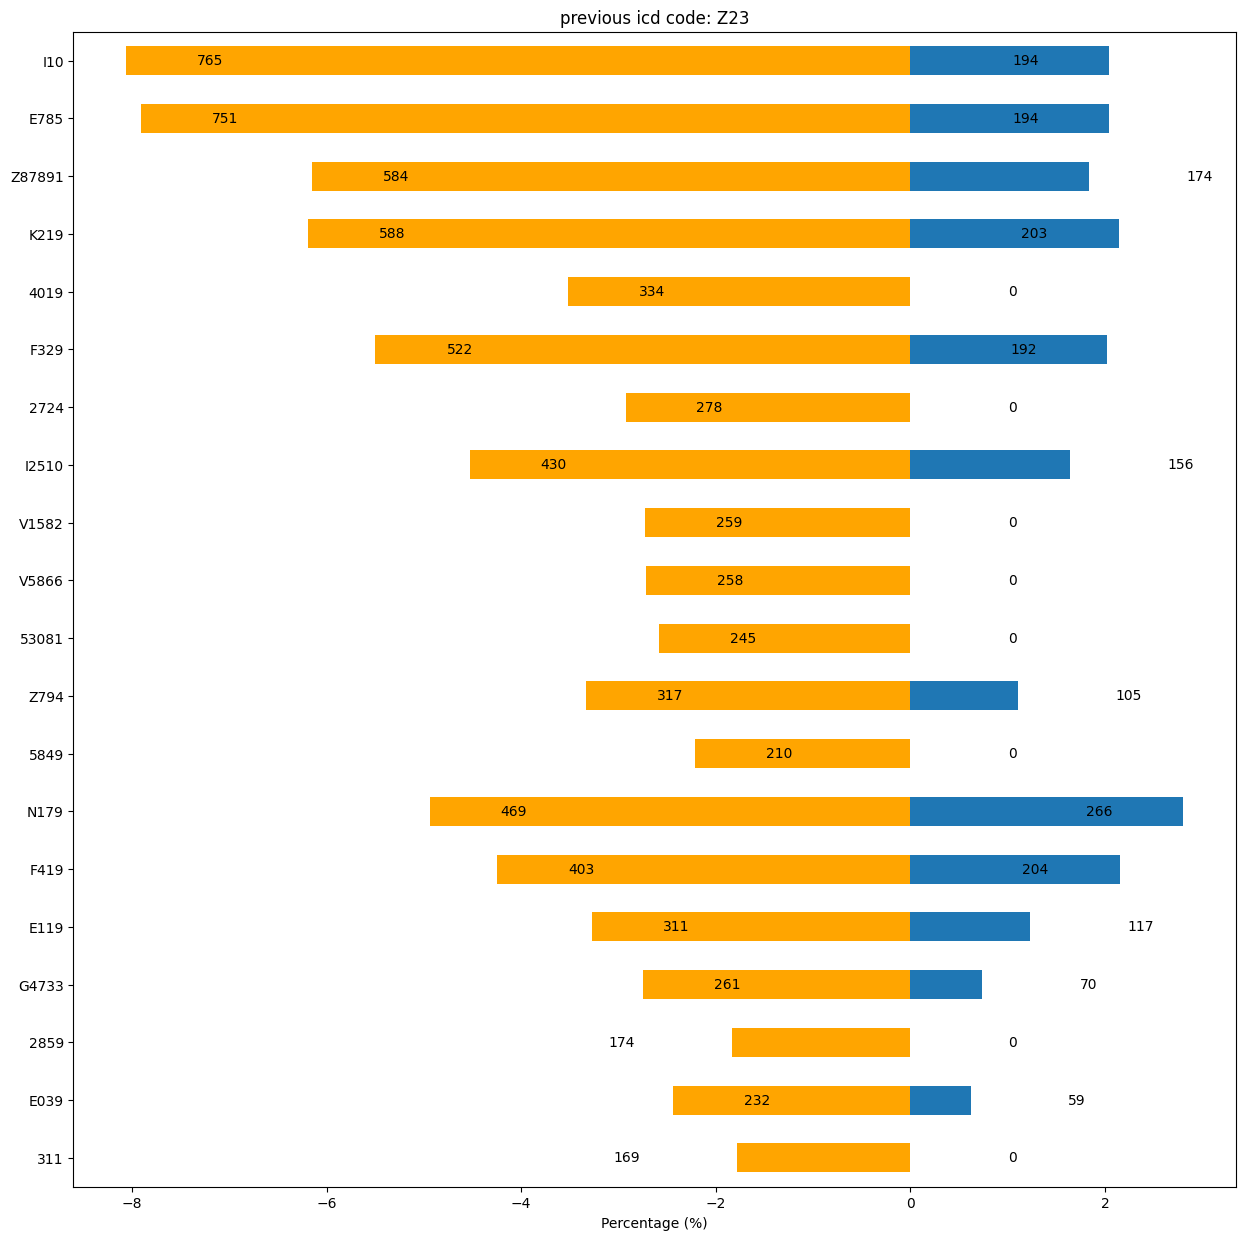

In [ ]:
disease_count_plot(data, prev_icd='Z23', forward_years=1, backward_years=3)

<ipython-input-19-7b7099ad811f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_copy['cnt'].iloc[i] += res['count'].iloc[j]


,disease,describe,cnt
0,A00-B99,Certain infectious and parasitic diseases,5
1,C00-D49,Neoplasms,3
2,D50-D89,Diseases of the blood and blood-forming organs...,175
3,E00-E89,"Endocrine, nutritional and metabolic diseases",20
4,F01-F99,"Mental, Behavioral and Neurodevelopmental diso...",11
5,G00-G99,Diseases of the nervous system,8
6,H00-H59,Diseases of the eye and adnexa,2
7,H60-H95,Diseases of the ear and mastoid process,6
8,I00-I99,Diseases of the circulatory system,6
9,J00-J99,Diseases of the respiratory system,0


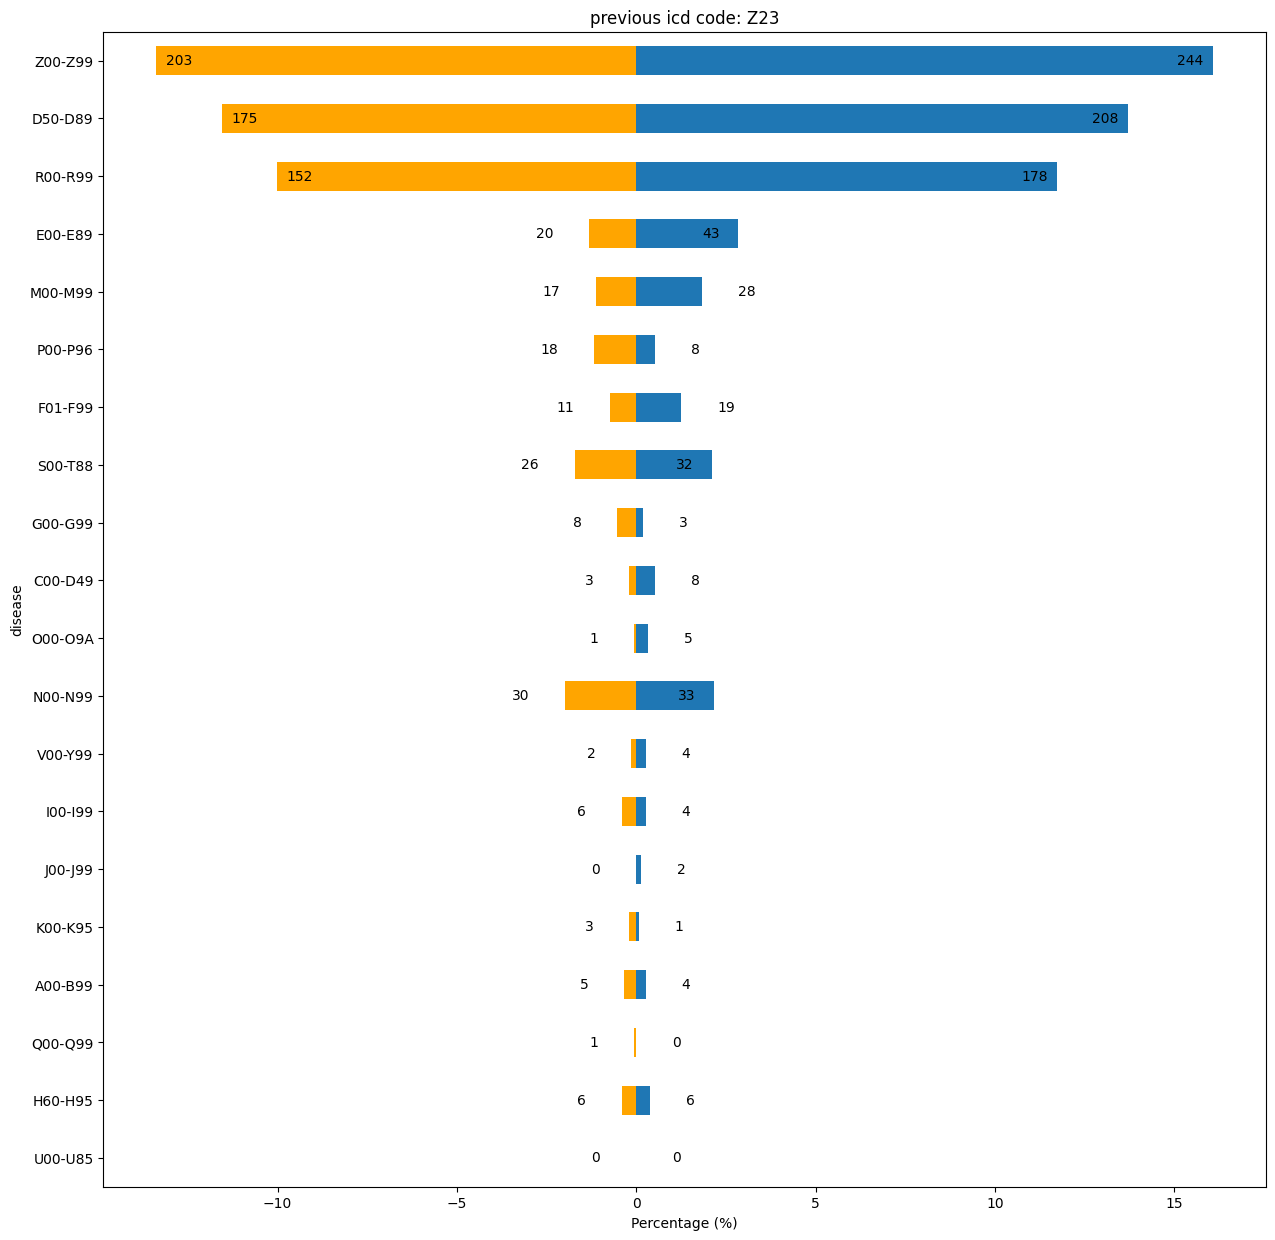

In [ ]:
disease_count_plot(data, prev_icd='Z23', forward_years=1, backward_years=3, level_number=0)

<ipython-input-19-7b7099ad811f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_copy['cnt'].iloc[i] += res['count'].iloc[j]


,disease,describe,cnt
0,A00-A09,Intestinal infectious diseases,8
1,A15-A19,Tuberculosis,3
2,A20-A28,Certain zoonotic bacterial diseases,0
3,A30-A49,Other bacterial diseases,6
4,A50-A64,Infections with a predominantly sexual mode of...,0
...,...,...,...
280,Z66-Z66,Do not resuscitate status,207
281,Z67-Z67,Blood type,0
282,Z68-Z68,Body mass index (BMI),608
283,Z69-Z76,Persons encountering health services in other ...,37


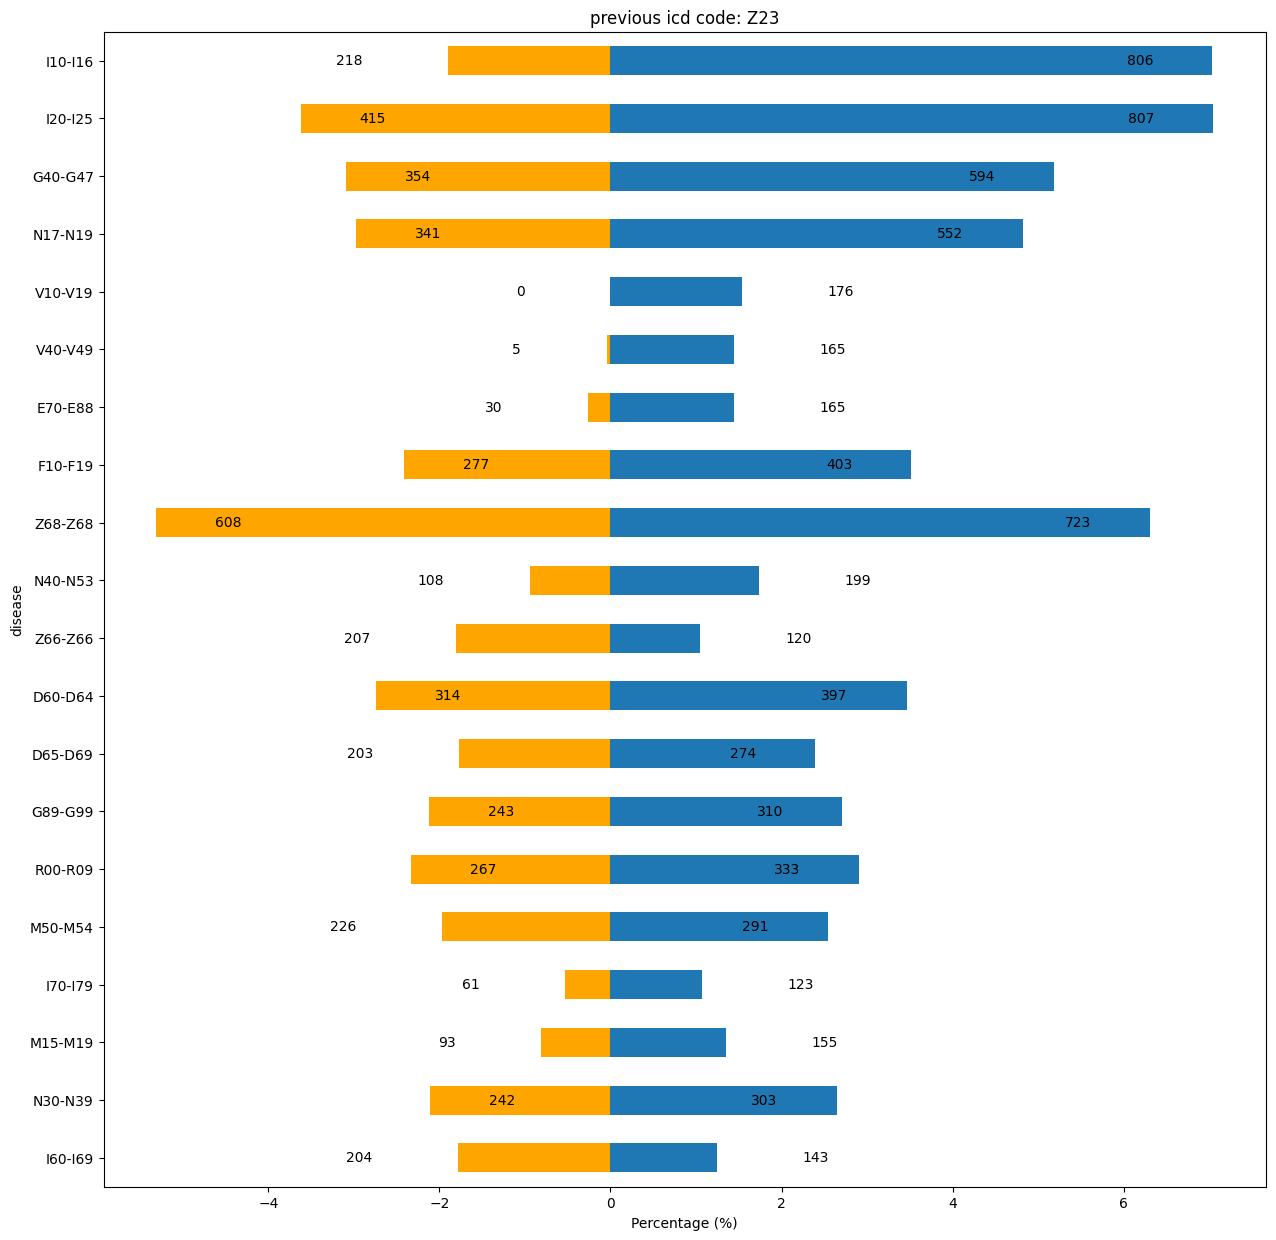

In [ ]:
disease_count_plot(data, prev_icd='Z23', forward_years=1, backward_years=3, level_number=1)

  0%|          | 0/95528 [00:00<?, ?it/s]<ipython-input-20-43f88fef6d4b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level_copy['cnt'].iloc[i] = startwith_res['count'].sum()
100%|██████████| 95528/95528 [06:10<00:00, 258.08it/s]


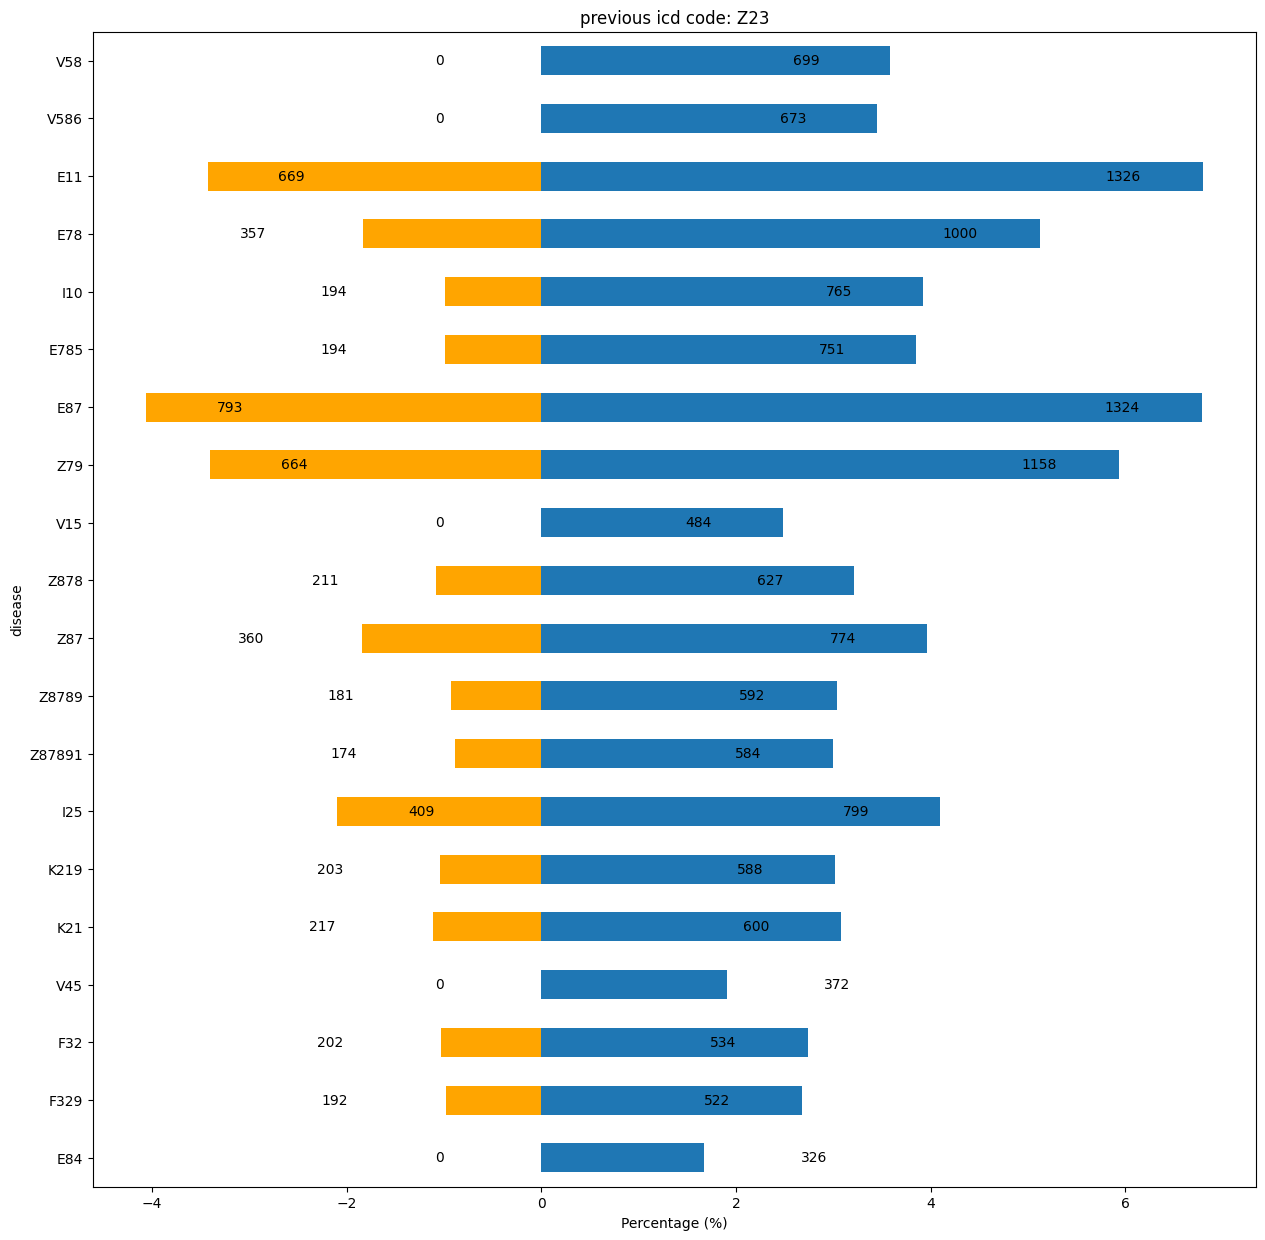

In [ ]:
disease_count_plot(data, prev_icd='Z23', forward_years=1, backward_years=3, level_number=2)

# 상위 10 질병의 분석

In [ ]:
TOP_10 = data.value_counts("icd_code")[:10].index.to_list()
TOP_10

['4019',
 '2724',
 'I10',
 'E785',
 'Z87891',
 '53081',
 'K219',
 '25000',
 '311',
 'F329']

TOP1


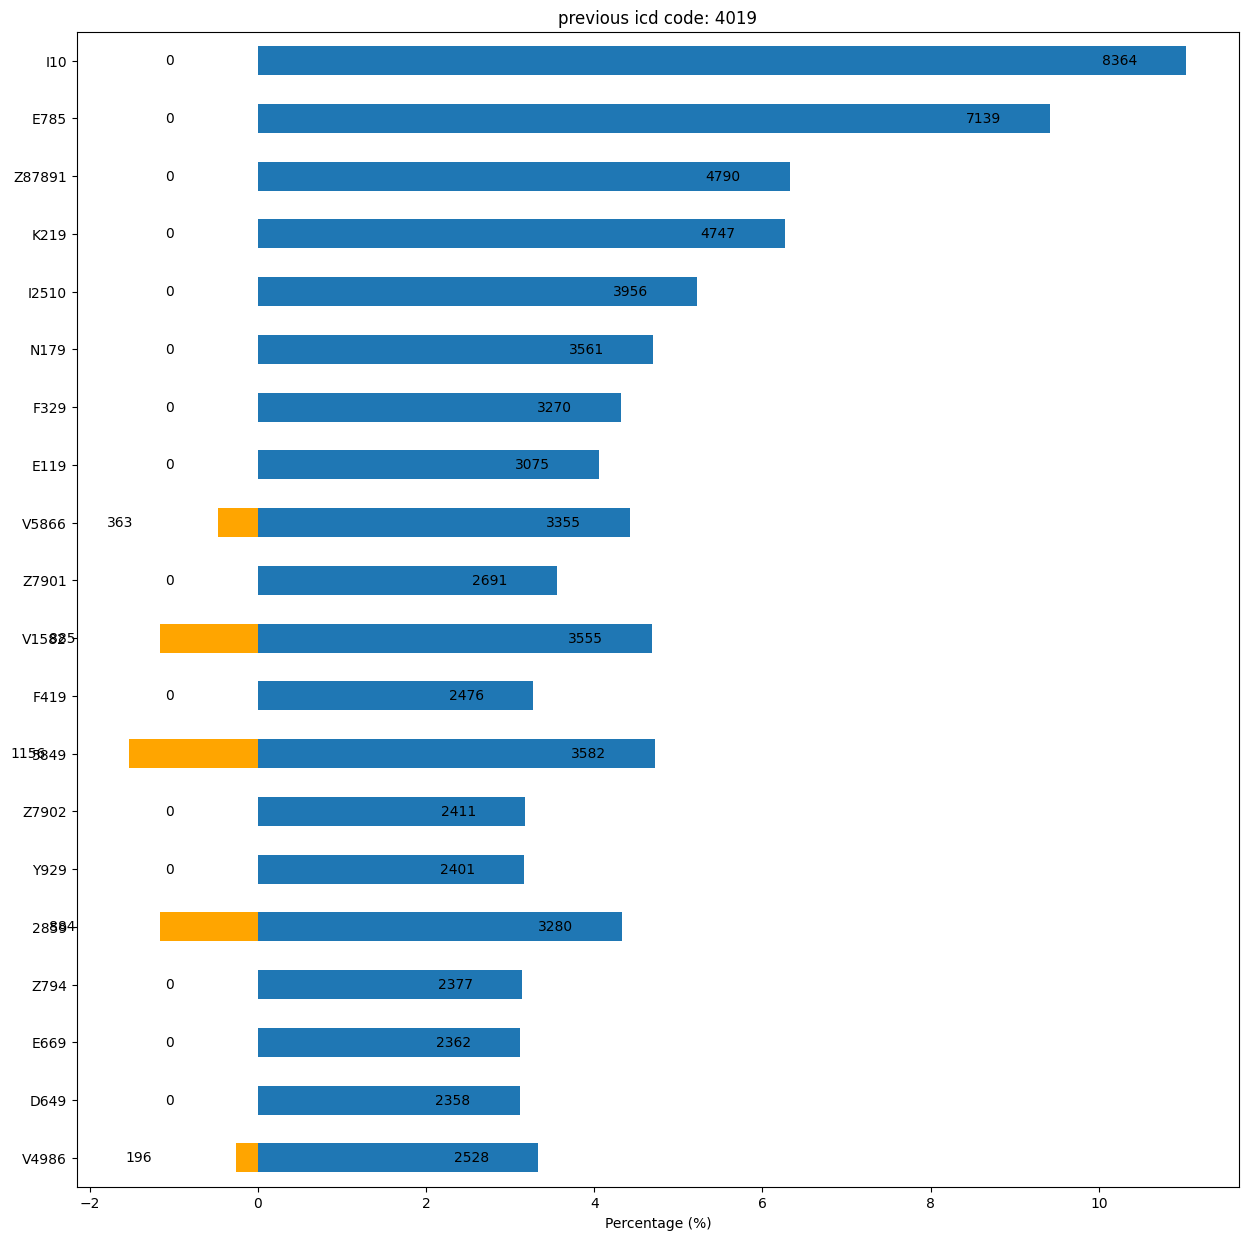

TOP2


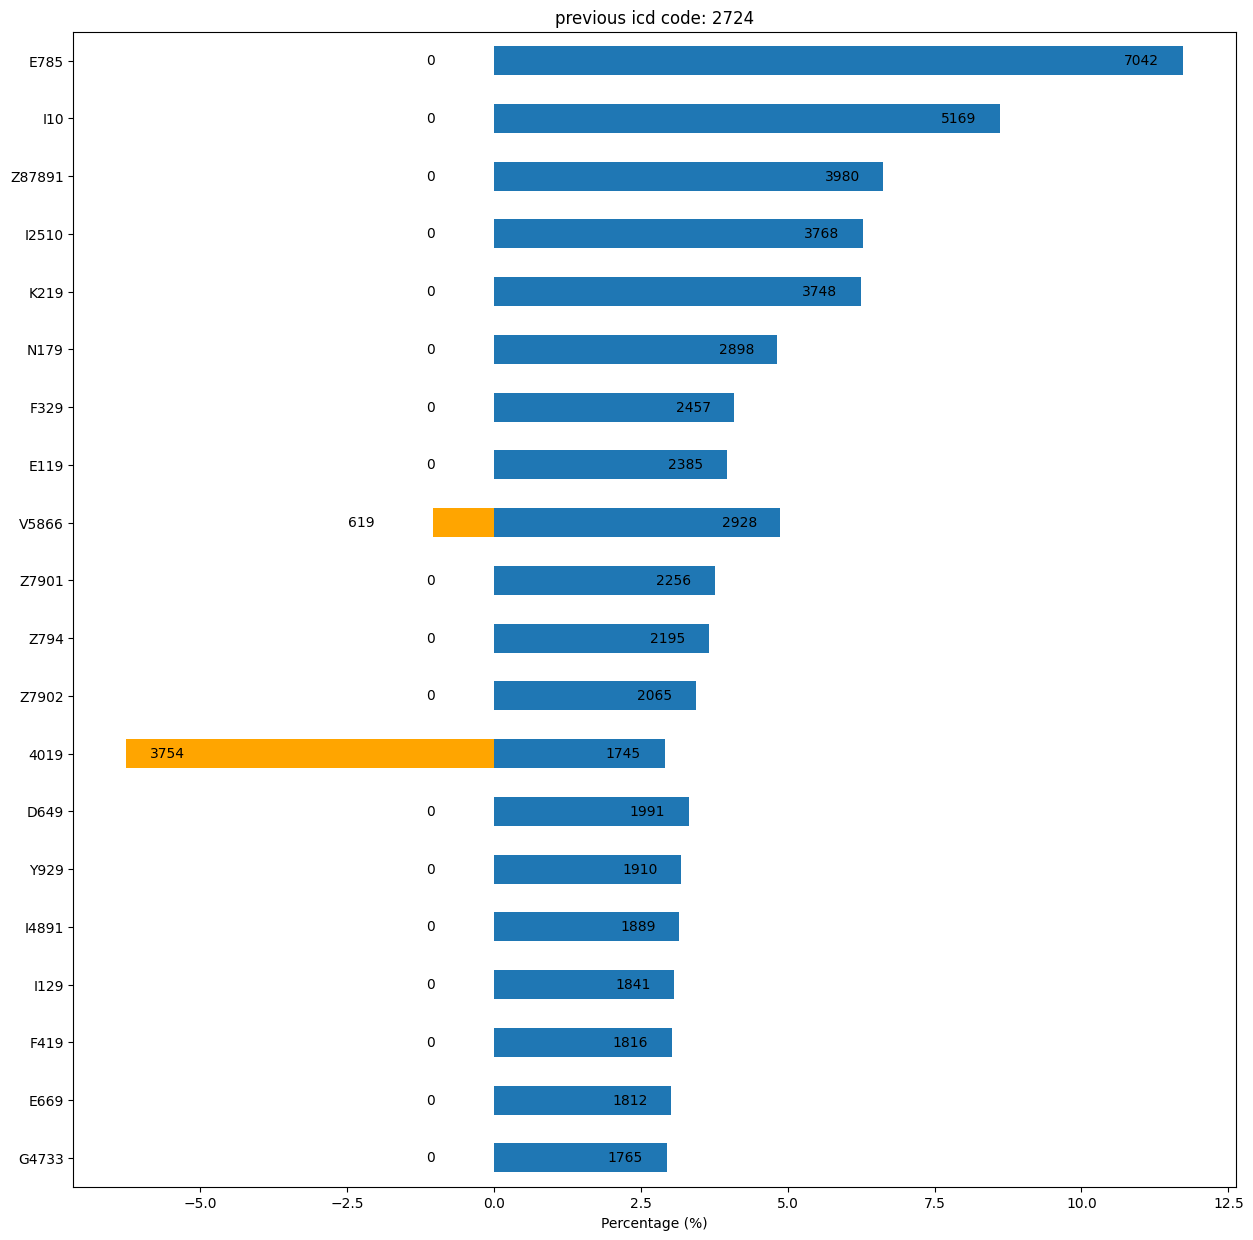

TOP3


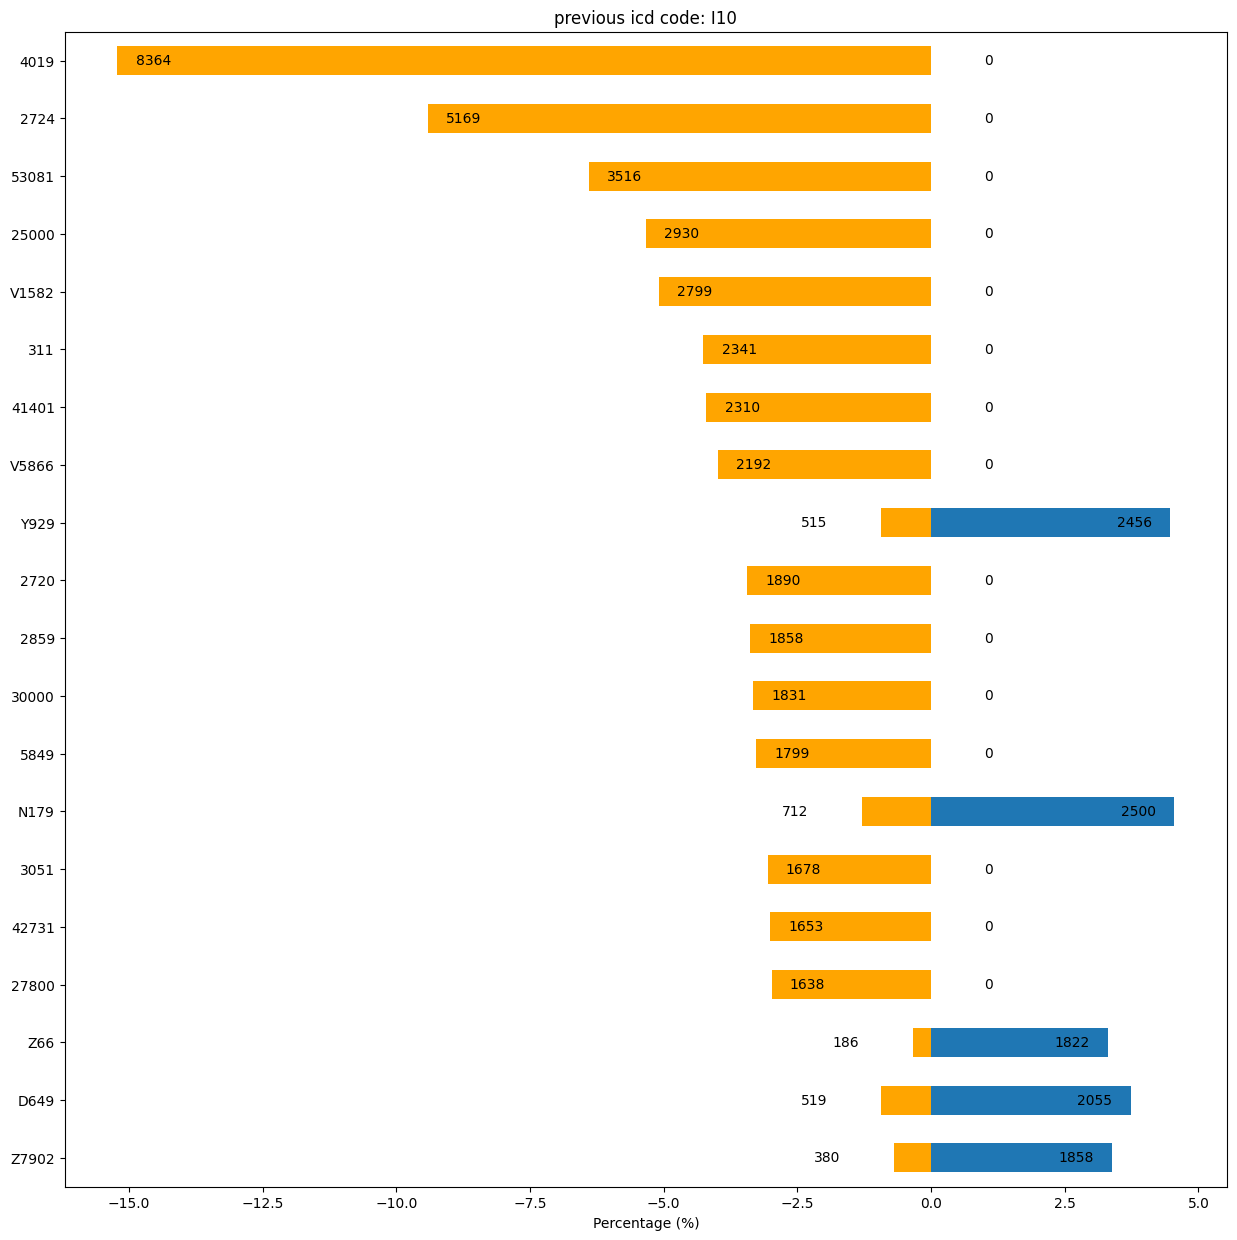

TOP4


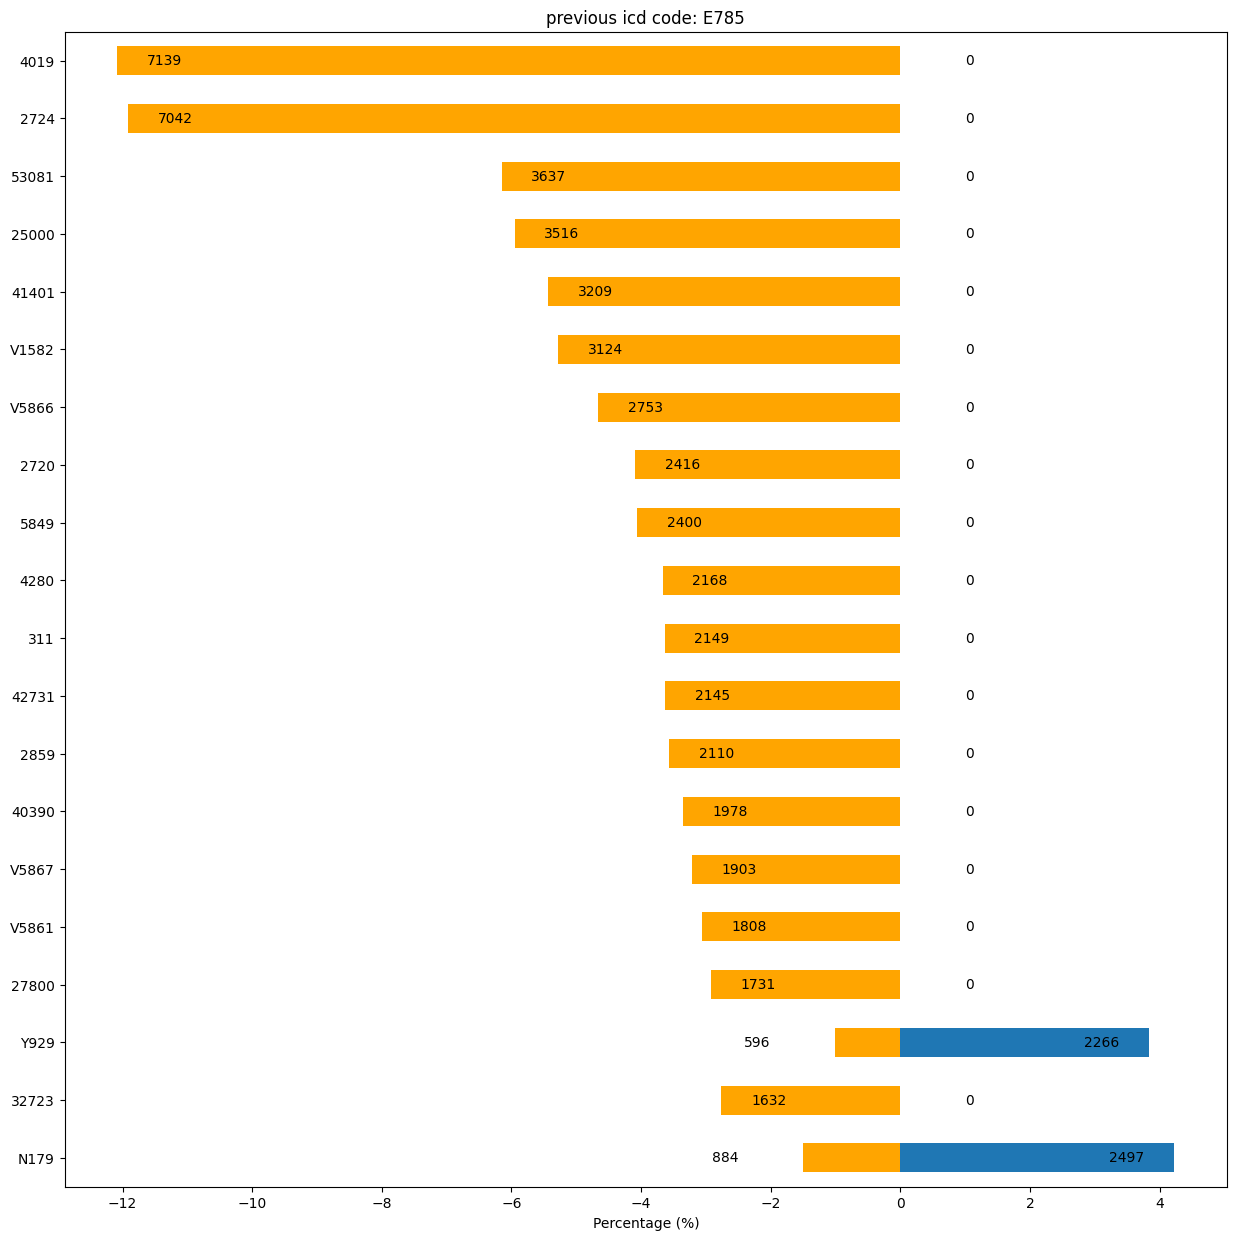

TOP5


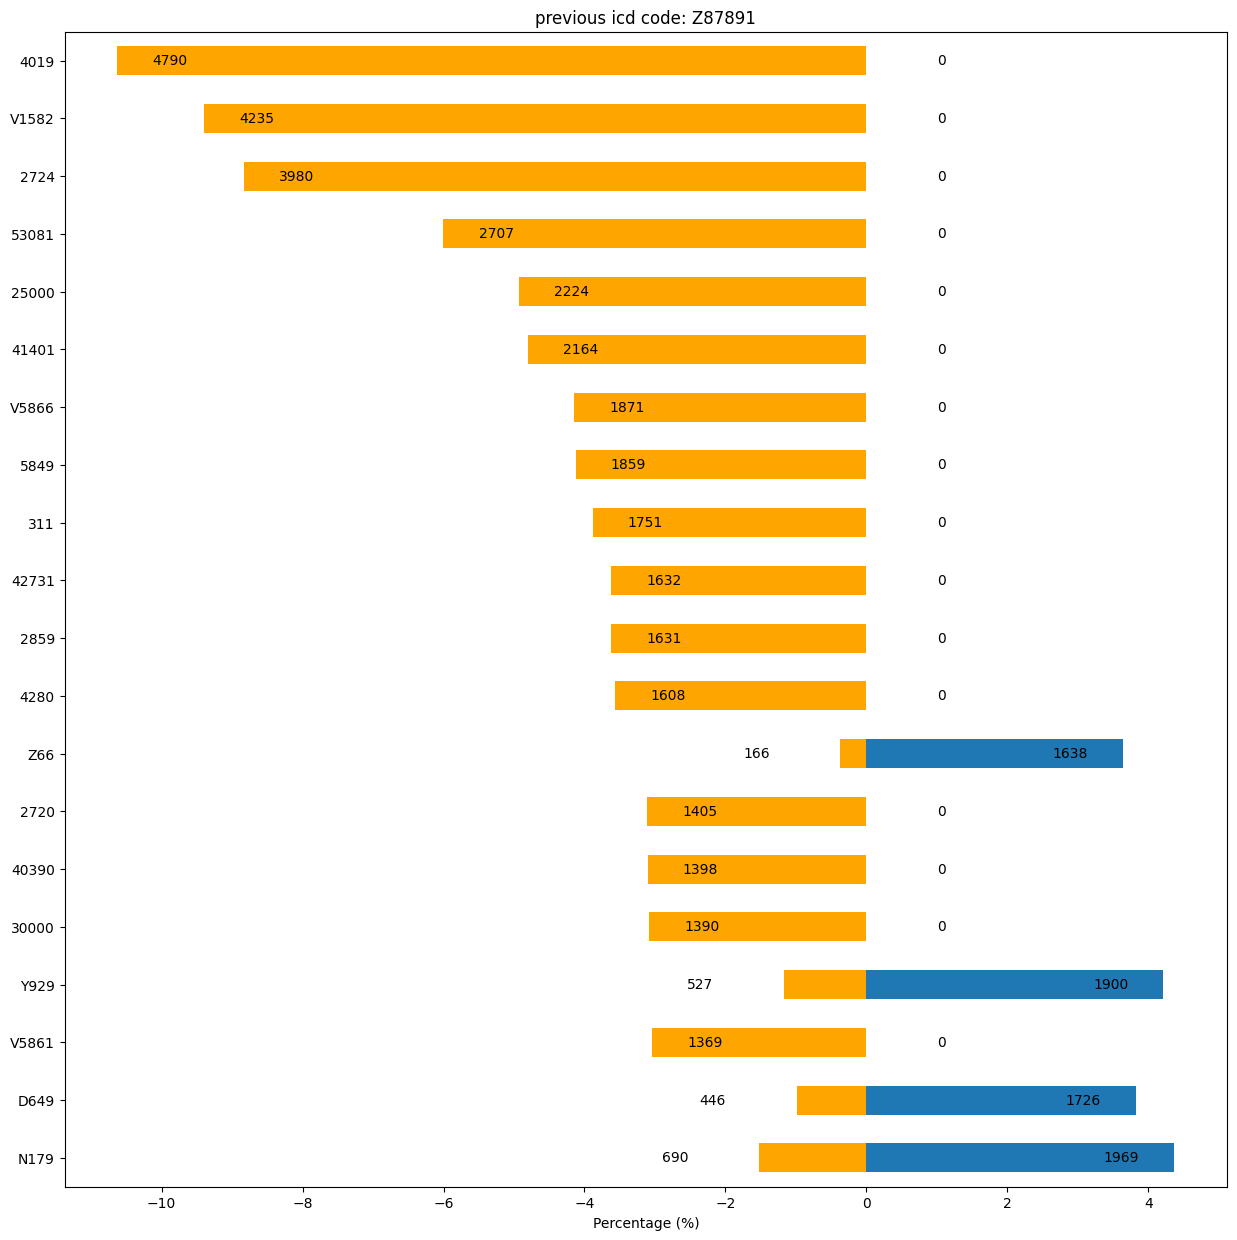

TOP6


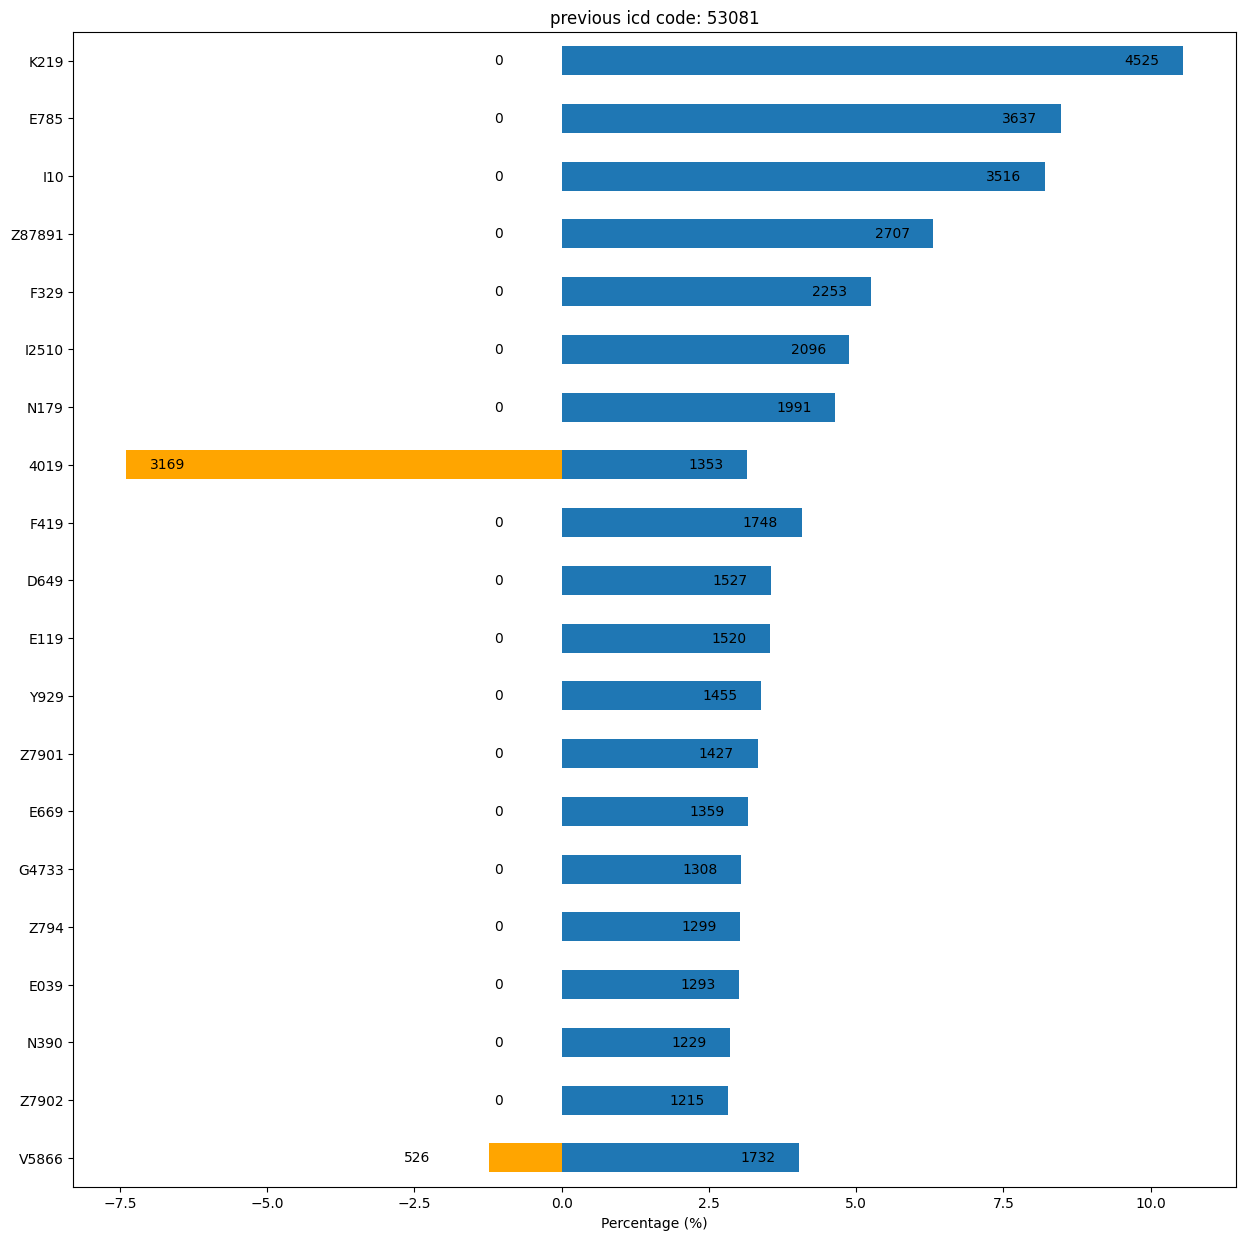

TOP7


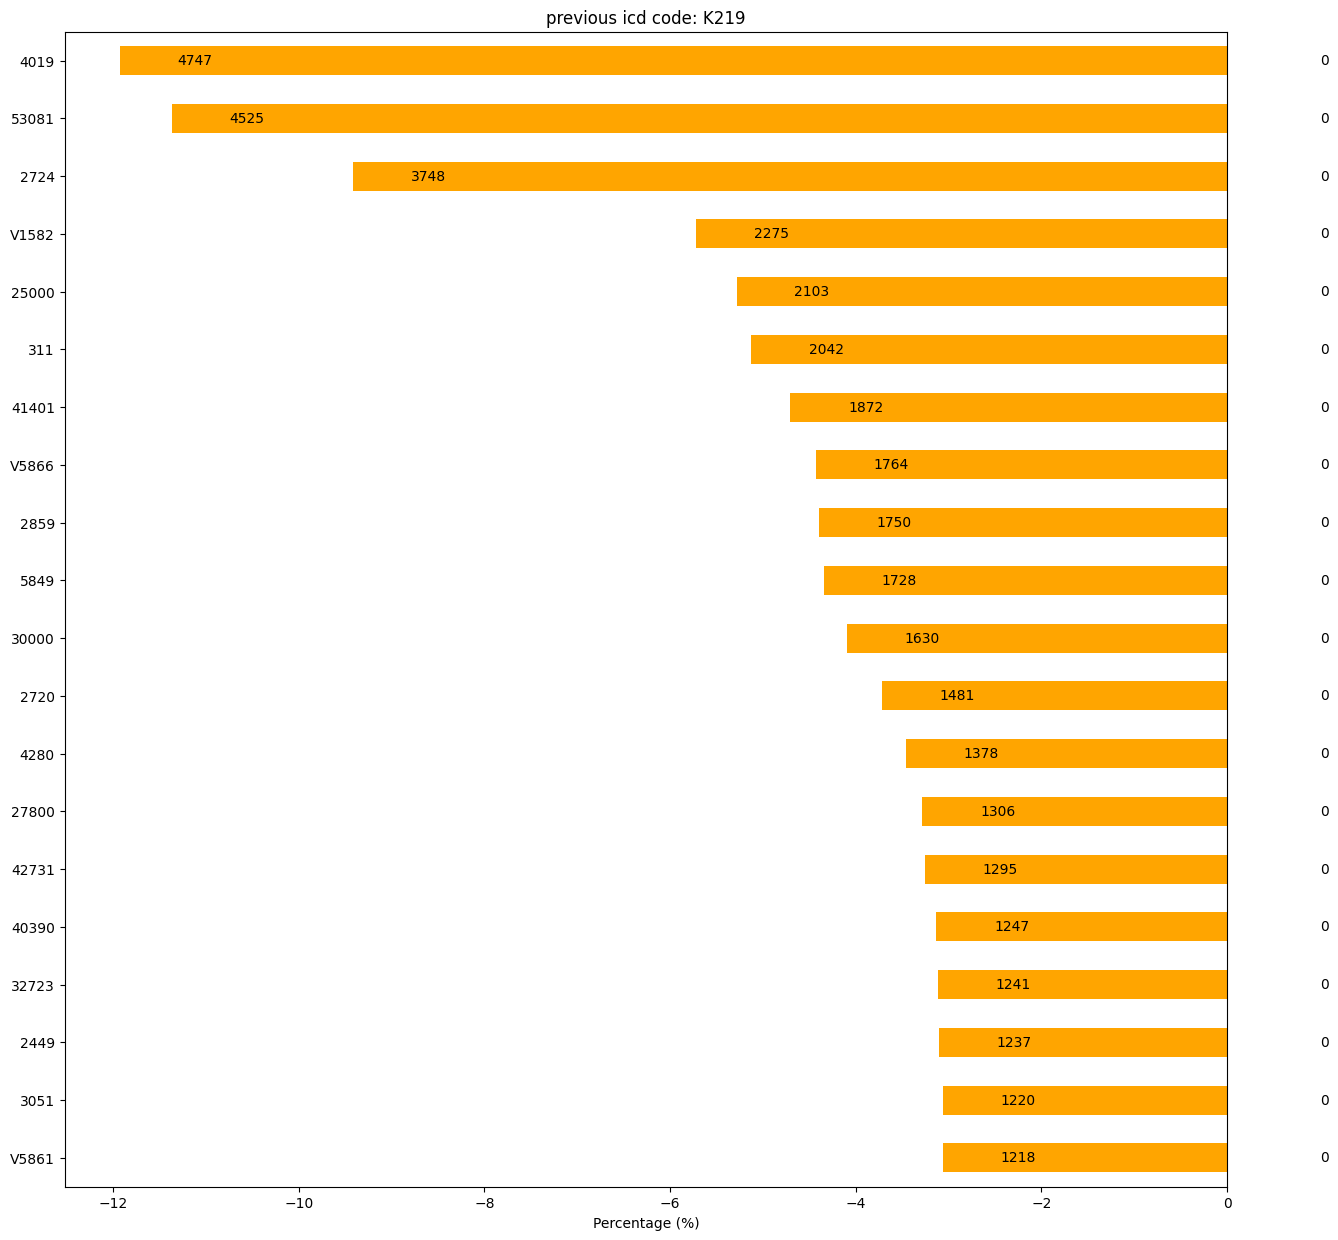

TOP8


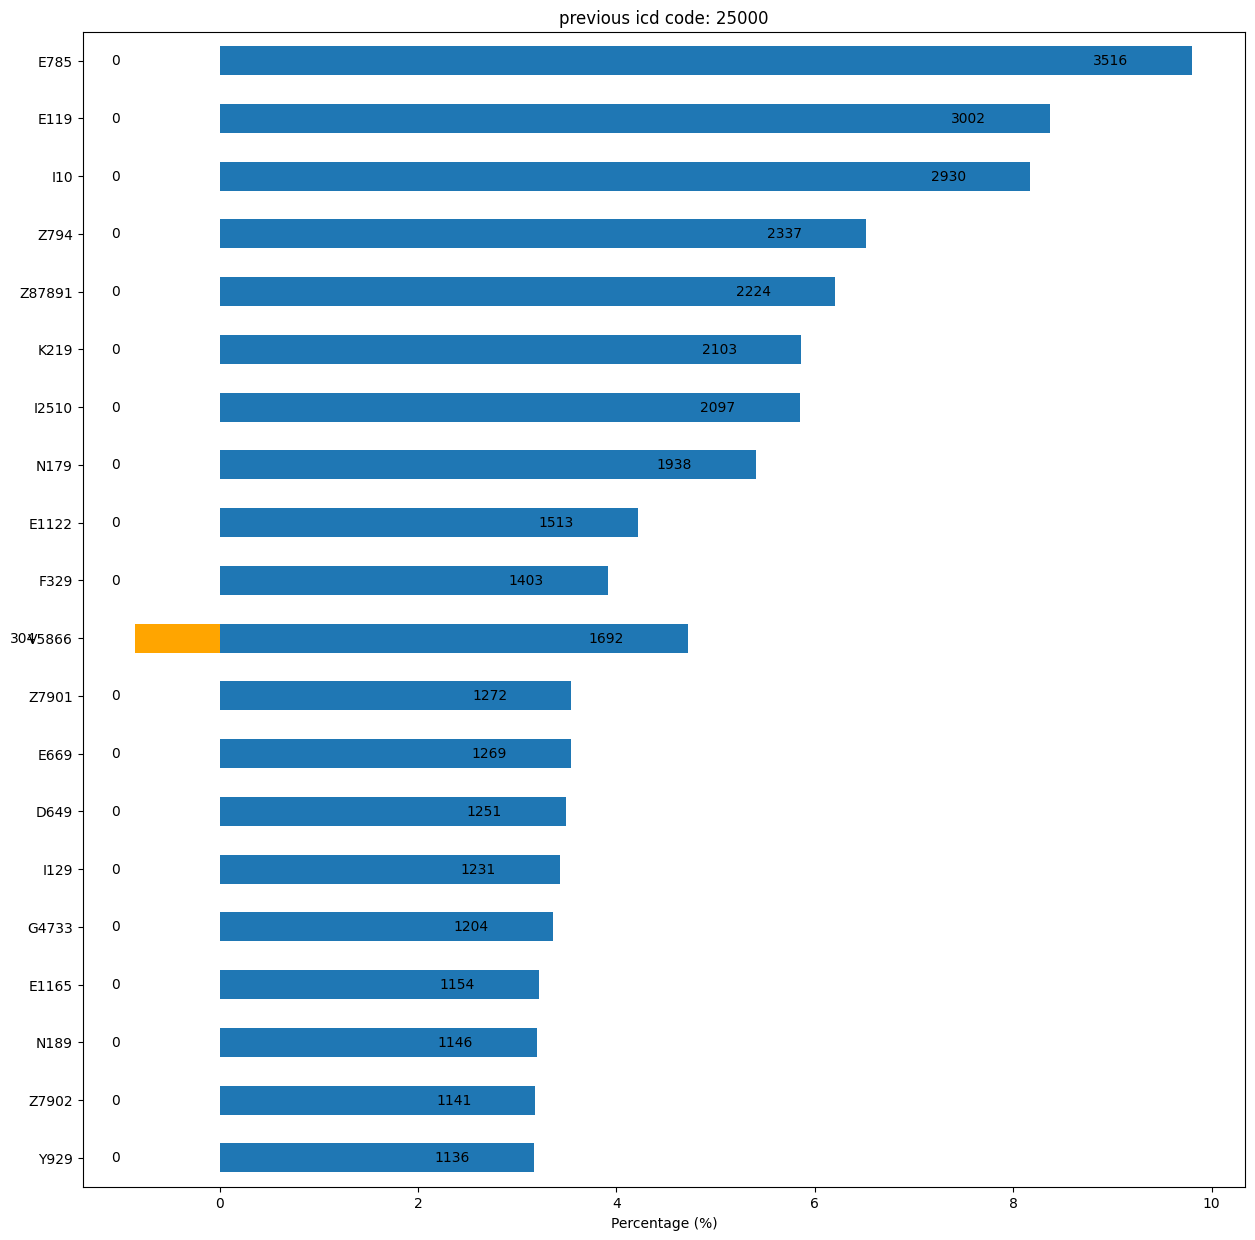

TOP9


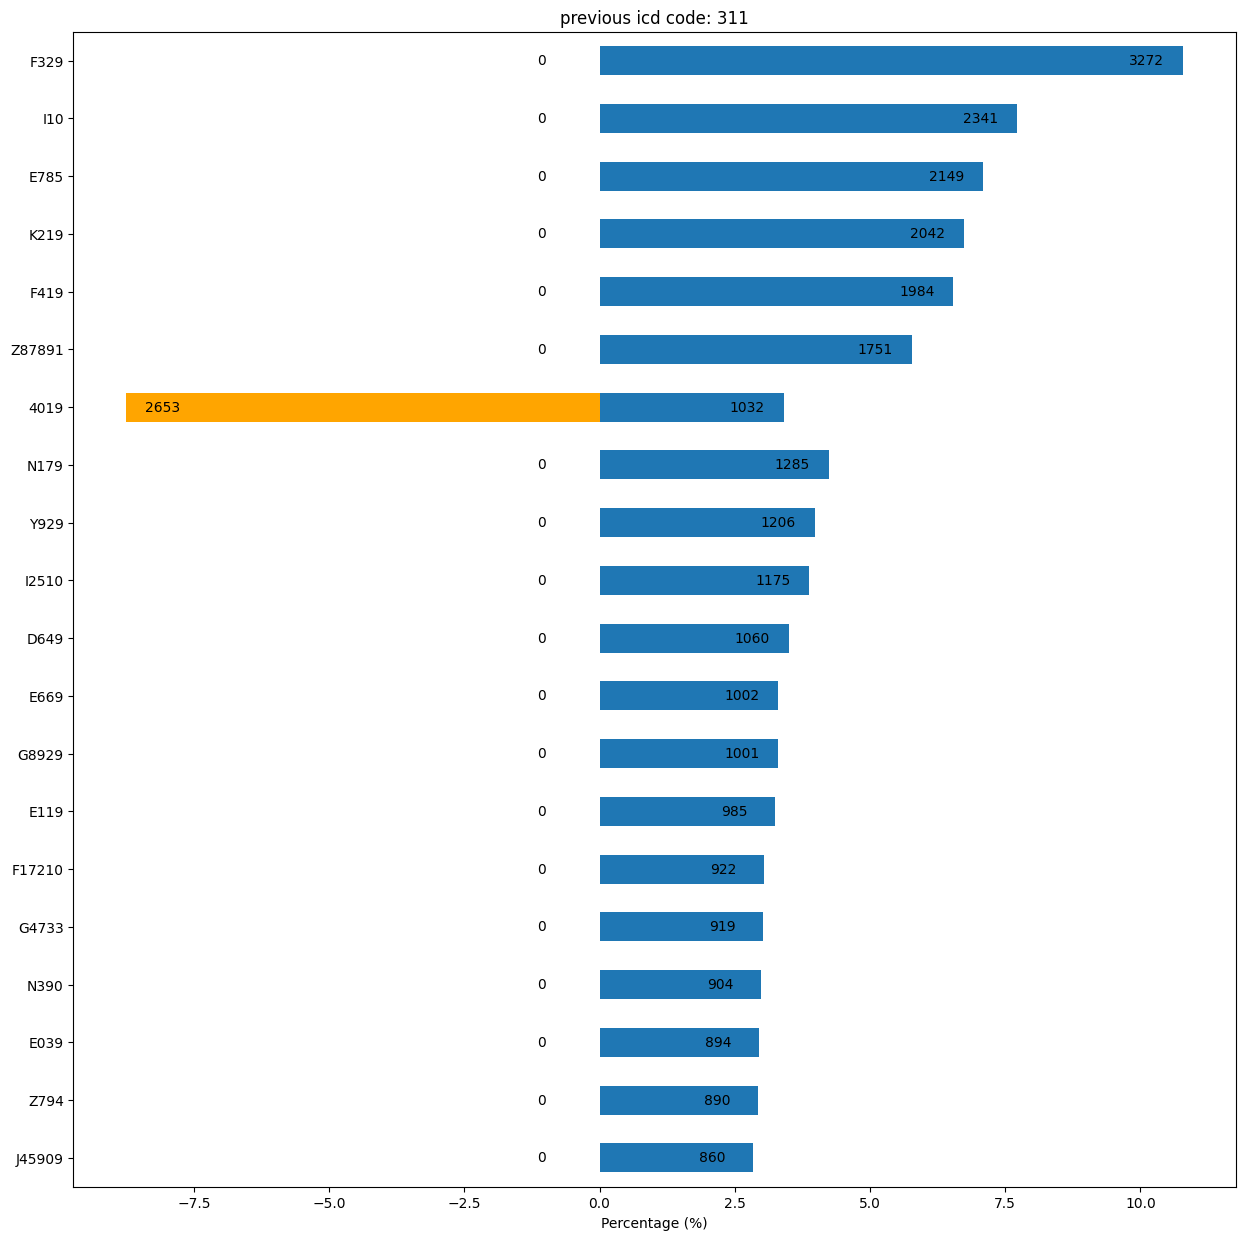

TOP10


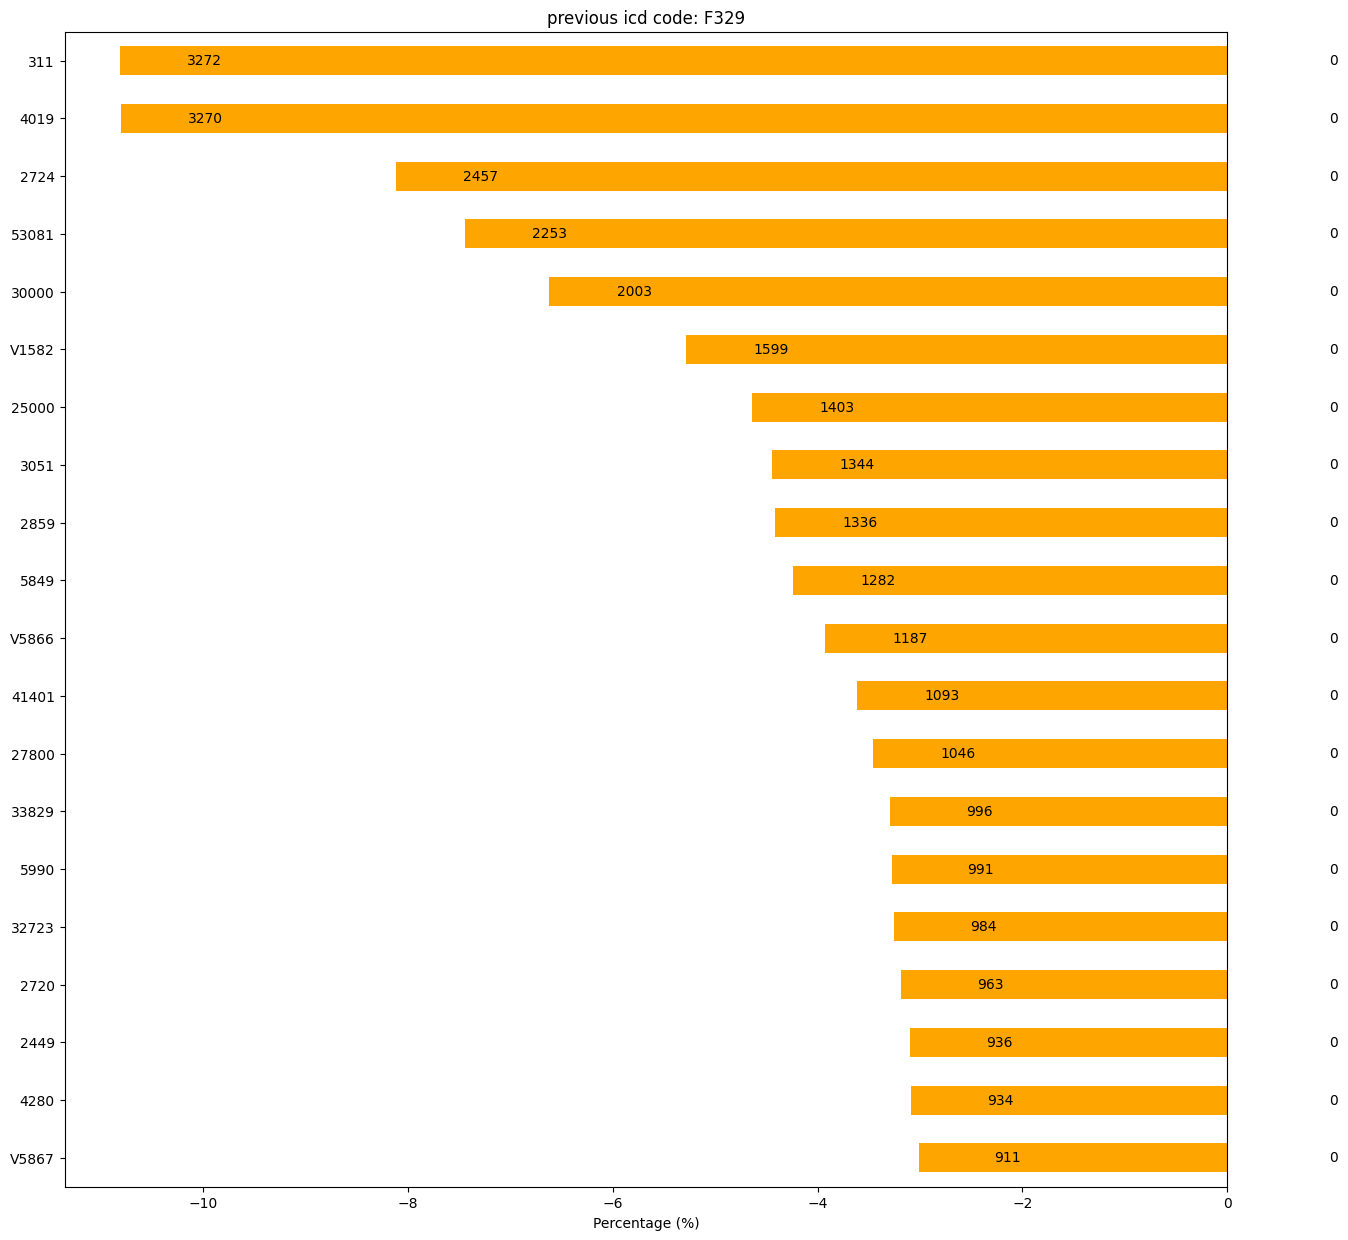

In [ ]:
for i, disease in enumerate(TOP_10):
  print(f"TOP{i+1}")
  disease_count_plot(prev_icd = disease)
  # def disease_count_plot(data=data, age=None, gen=None, mrg=None, eth=None, prev_icd=None, forward_years=103, backward_years=103, level_number=None):